# BREAST CANCER CLASSIFICATION
The objective of this project is to evaluate the performance of supervised learning techniques in classificationto on a real-world dataset.Classification models under supervised learning techniques are trained and tested using `breast cancer` dataset available in the `sklearn` library.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)#to display all columns when displaying the dataset

# Importing Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Dataset Information

In [3]:
#checking type of data
print(f'Type of data: {type(data)}')

Type of data: <class 'sklearn.utils._bunch.Bunch'>


In [4]:
#description of generated dataset
print(colored("DESCRIPTION OF DATASET\n______________________\n", "green"))
print(data.DESCR)

DESCRIPTION OF DATASET
______________________

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 

In [5]:
#converting data to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
#adding target to dataframe
df['target']=data.target

In [6]:
#inspecting first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
#basic information on dataset
print(colored("BASIC INFO\n__________\n", "green"))
print(f'Shape: {df.shape}')
rows,cols=df.shape
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {cols}')
print(f'Number of Features: {cols-1}')
print(f'Features:\n{list(df.columns[:-1])}')
print(f'Target: {df.target.unique()}')
print(f'Target Labels: {data.target_names}')

BASIC INFO
__________

Shape: (569, 31)
Number of Rows: 569
Number of Columns: 31
Number of Features: 30
Features:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Target: [0 1]
Target Labels: ['malignant' 'benign']


**Target**     
 0: Malignant (cancerous)  
 1: Benign (non-cancerous) 

In [8]:
#feature wise information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#checking for null values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
#check for duplicated rows
df.duplicated().sum()

0

In [11]:
#basic statistical information on features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


>## Note: 
`the target is categorical and it has only 2 values hence we can use models that work on binary classification`     
<br>
`Target 0 represent malignant or cancerous entry`    
<br>
`Target 1 represent benign or non-cancerous entry`                
<br>
`Total Numerical Features: 30`     
<br>
`Total Categorical Features: 0`     
<br>
`There are no missing values in any columns`      
<br>
`There are no duplicate entries`       
<br>
`Considerable number of features are on different scales when compared to others`      
<br>
`The features with wider range or distribution should be scaled in preprocessing phase to improve model performance`

<hr>

# Data Exploration - EDA

Since the features are continuous we might not be able to visualize relationships between each features and the target in a meaningful way. Instead we will focus on:
- The distribution of features
- The Skewness of features

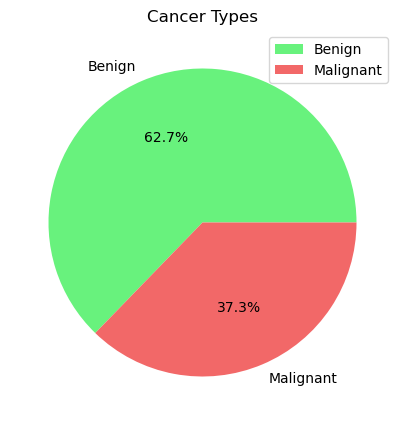

In [12]:
#creating a temporary column for visualizations
df['type']=df['target'].map({0:'Malignant',1:'Benign'})

#information on distribution of cancer types
plt.figure(figsize=(5,5))
count=df['type'].value_counts().values
index=df['type'].value_counts().index
plt.pie(count, labels=index,autopct='%1.1f%%',colors=['#68f27d','#f26868'])
plt.title('Cancer Types')
plt.legend()
plt.show()

In [13]:
df['type'].value_counts()

type
Benign       357
Malignant    212
Name: count, dtype: int64

>## Note: 
`357(62.7 %) observations are classified as Benign`     
`212(37.3 %) observations are classified as Malignant`   

### Graphical Analysis - Distribution of Data 

In [14]:
#creating a list of features
feature_list=df.columns[:-2]

In [15]:
#creating function to plot feature distribution
sns.set_theme(palette='flare')
def plot_distribution(feature):
    plt.figure(figsize=(10, 3))
    
    #histogram
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} - Histogram')
  
    plt.show()

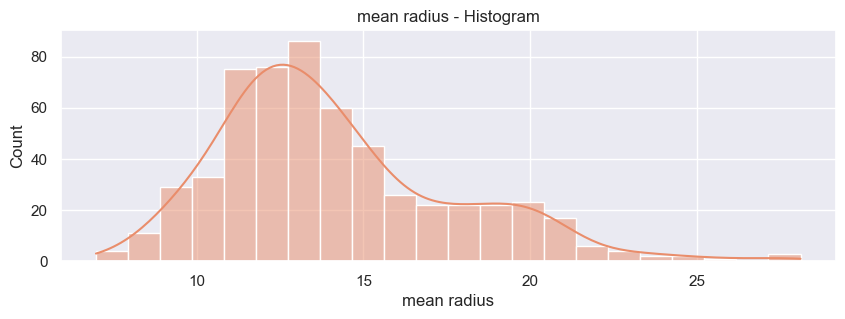

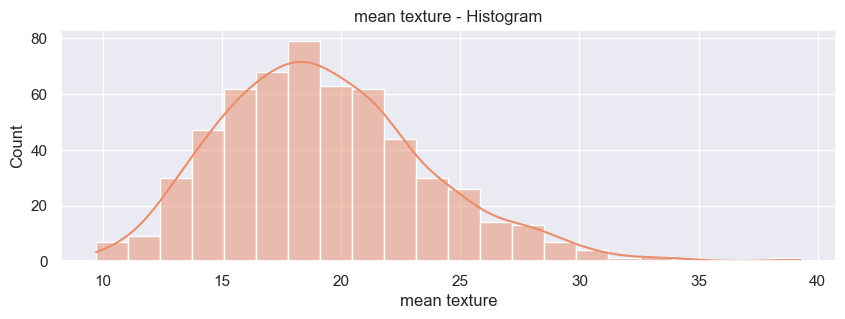

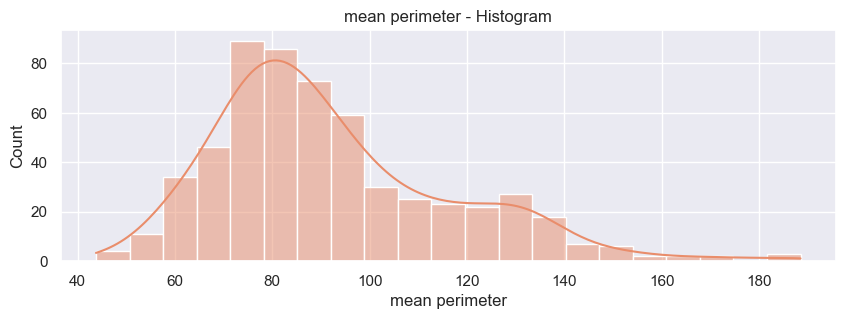

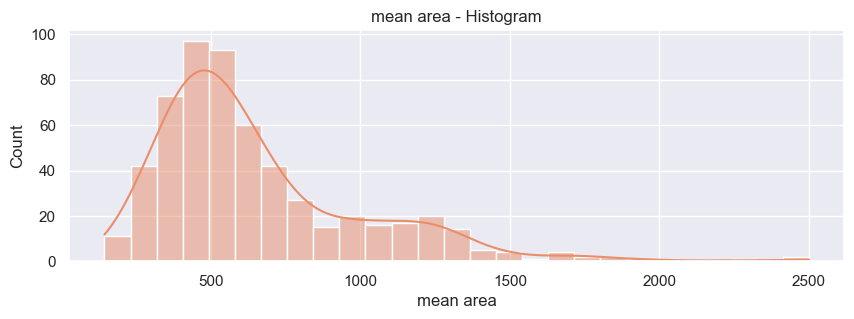

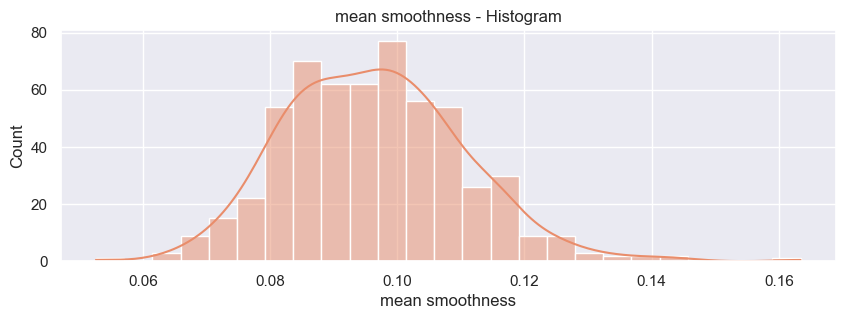

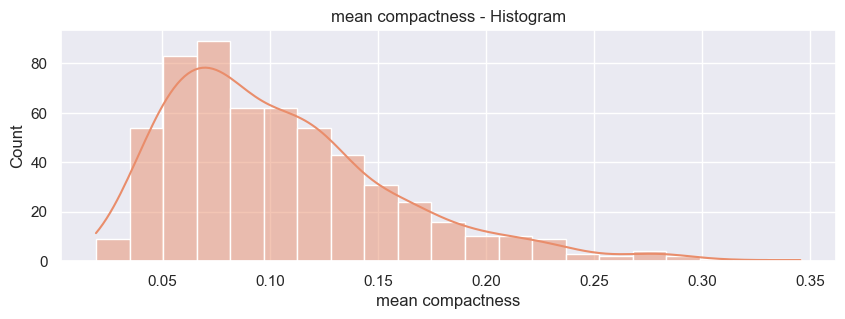

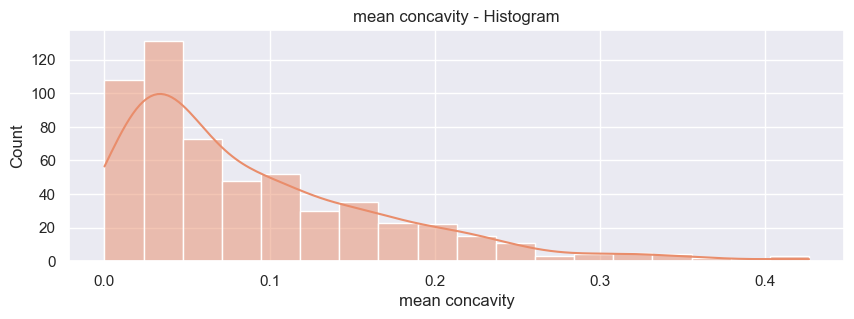

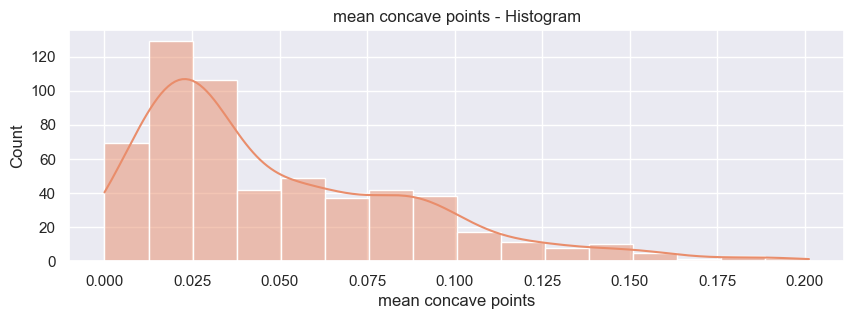

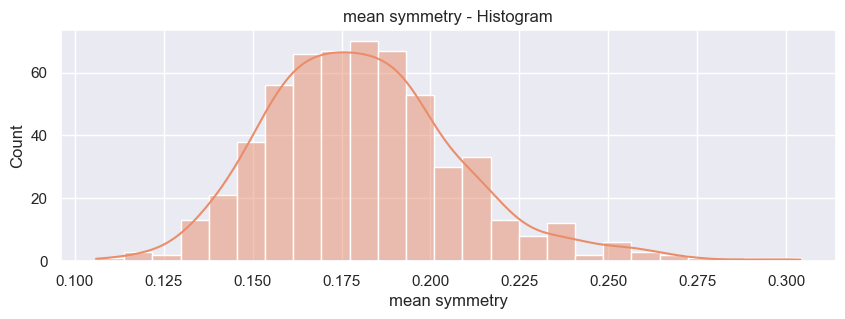

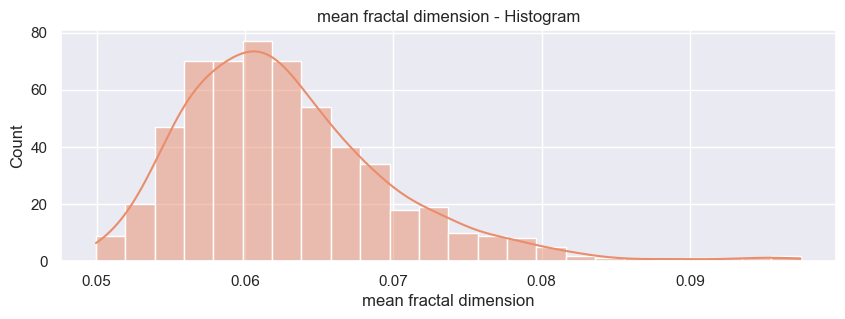

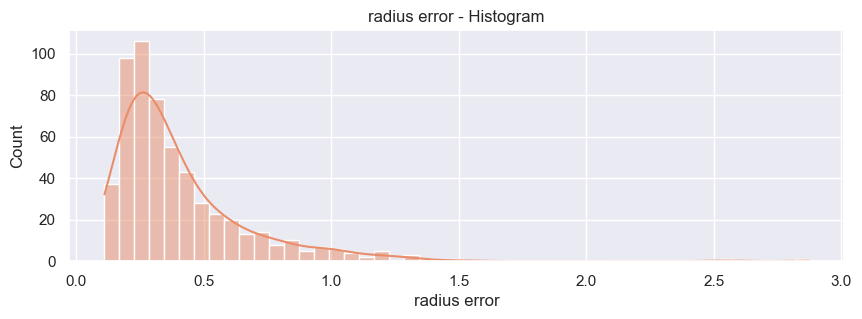

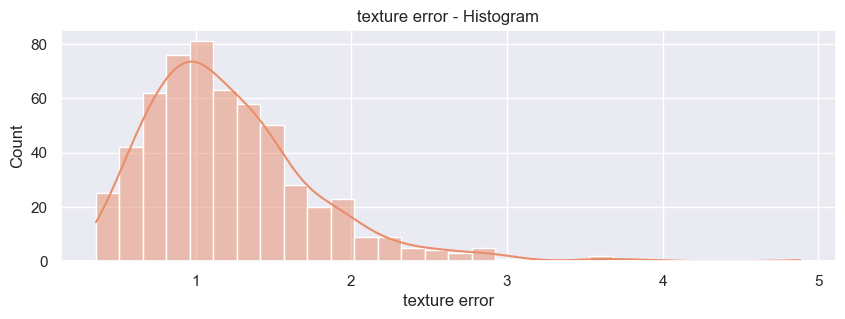

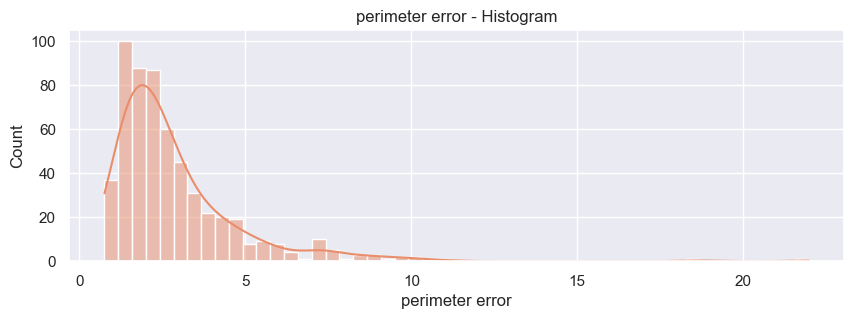

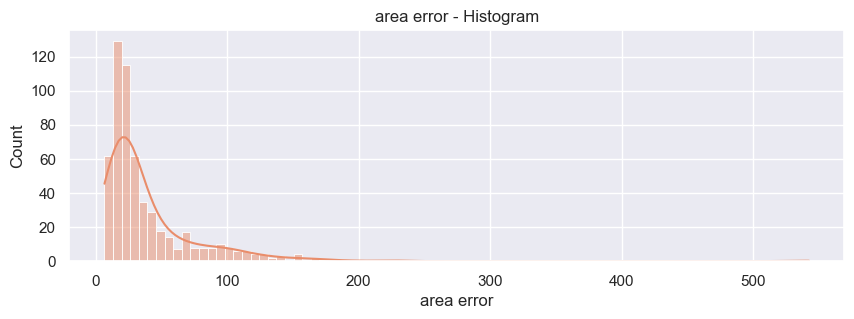

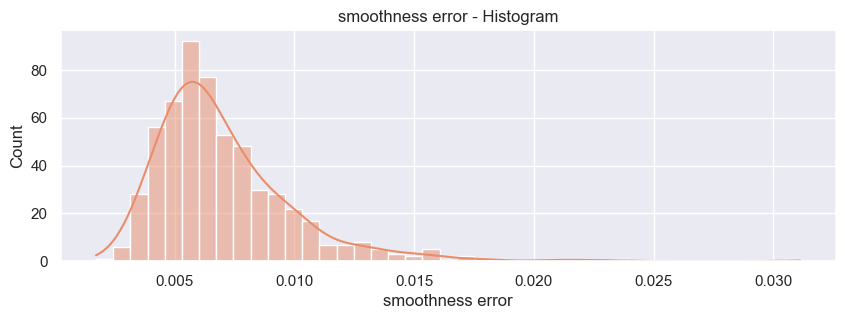

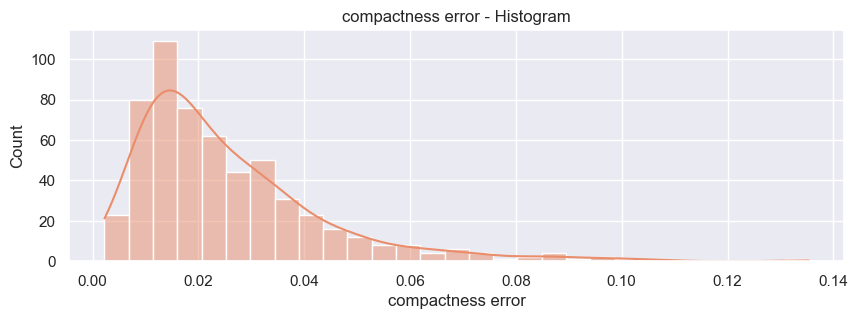

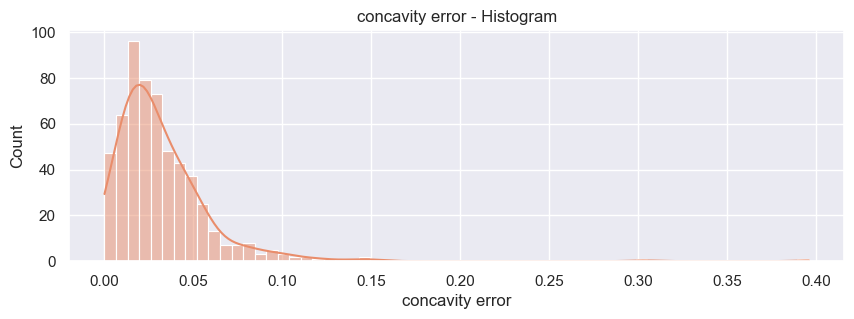

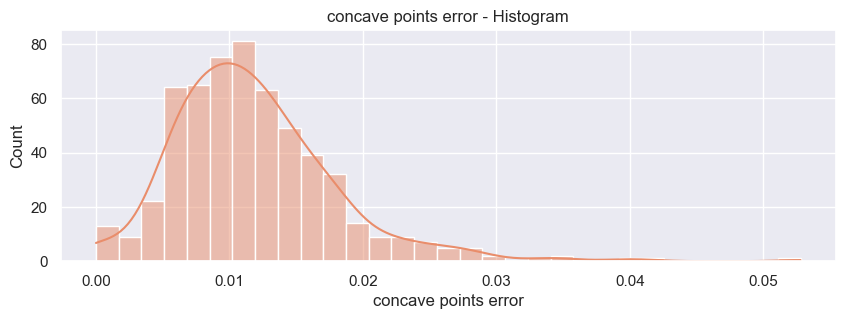

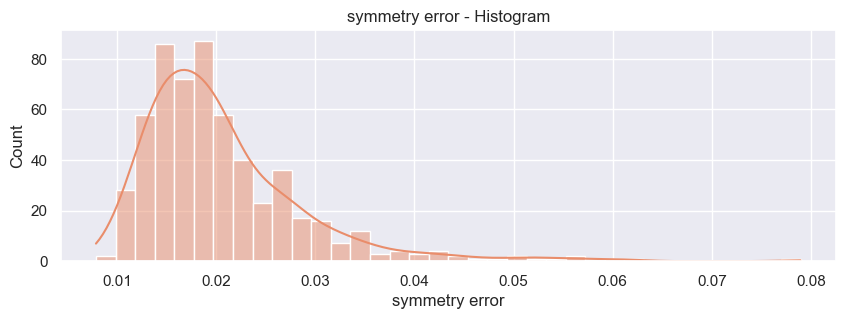

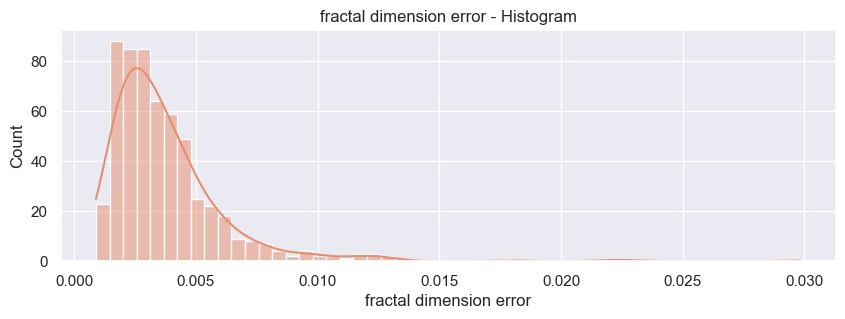

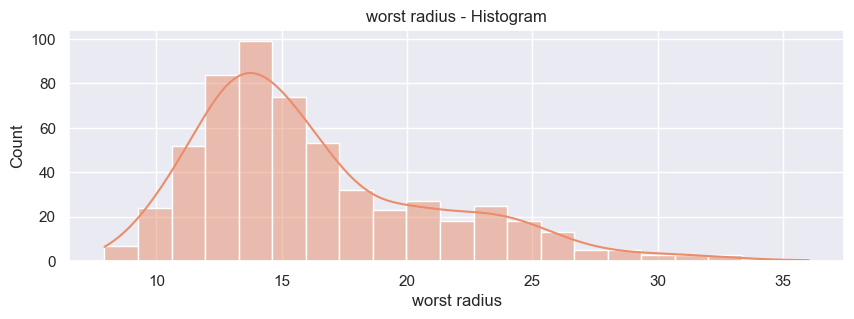

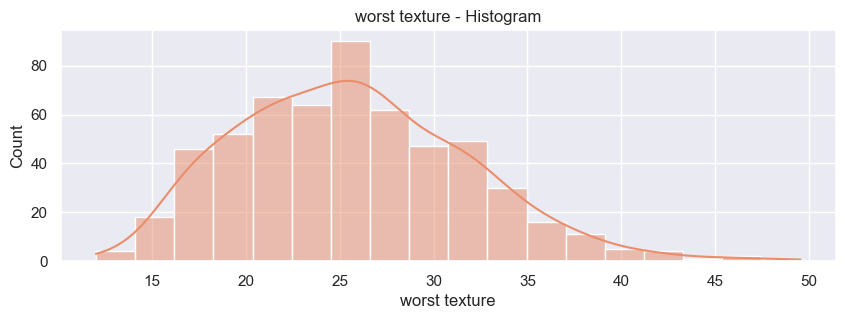

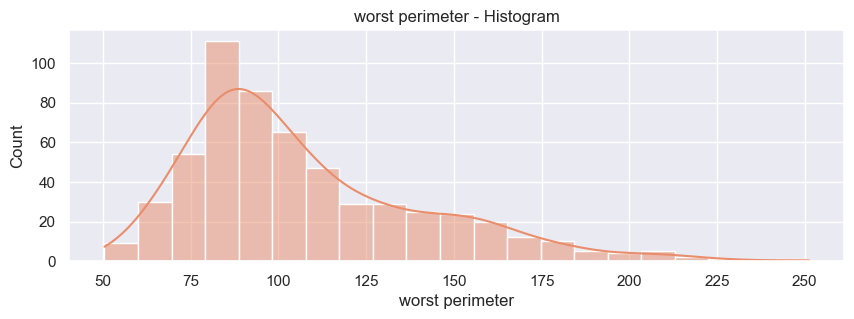

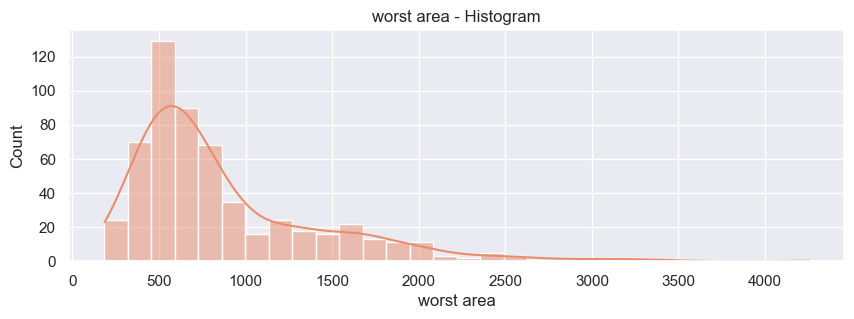

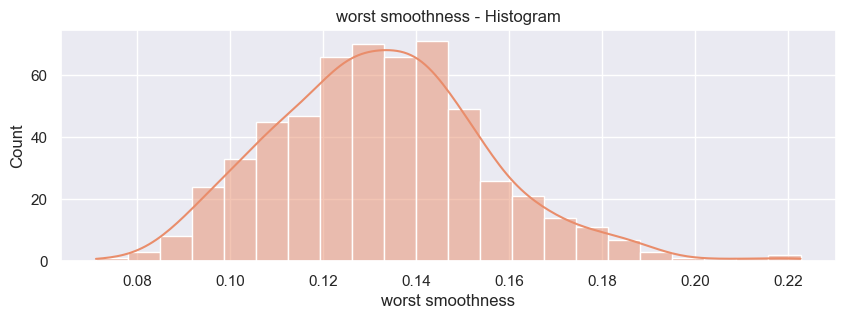

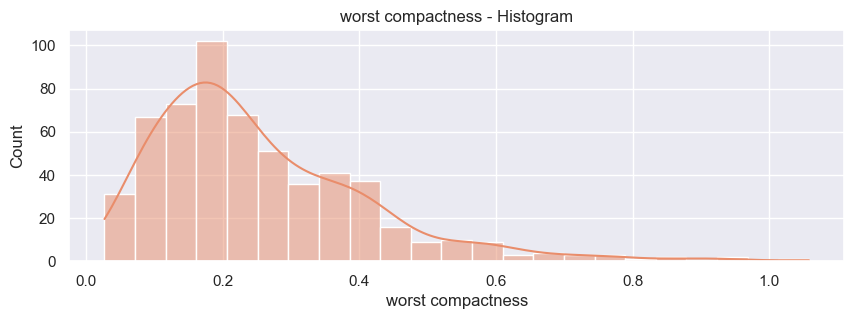

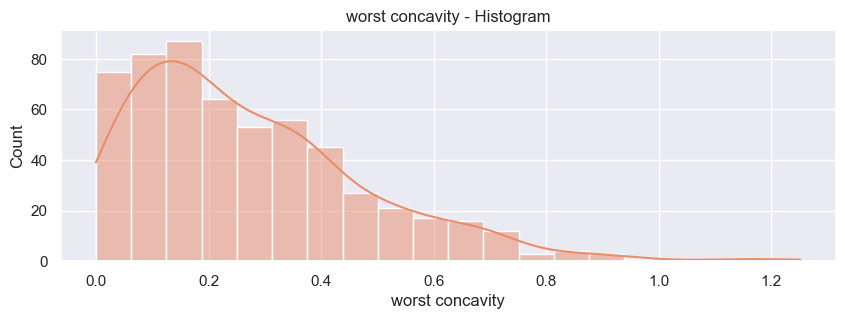

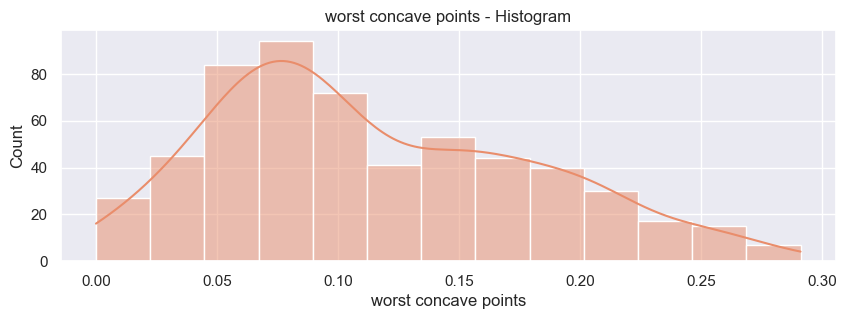

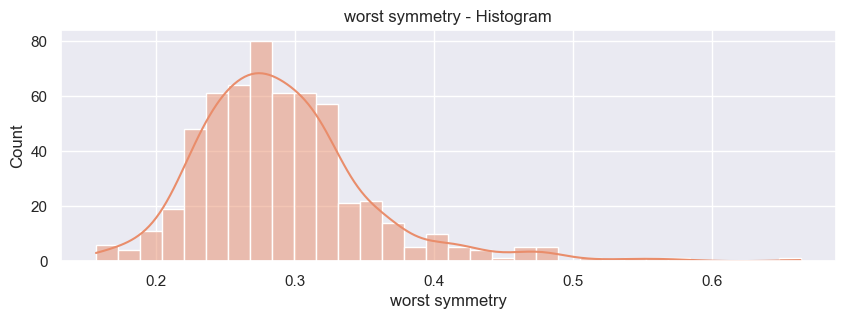

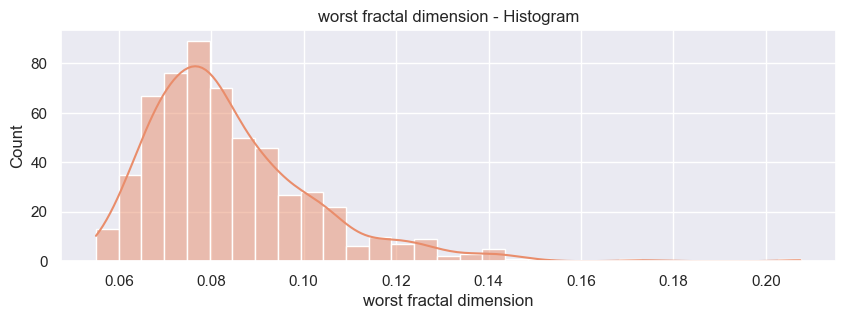

In [16]:
#plotting features
for feature in feature_list:
    plot_distribution(feature)

### Analyzing Skewness of Data

In [17]:
#displaying skewness of features
print(colored("Feature \t\tSkewness","green"))

for feature in feature_list:
    print(f"{feature} \t\t{df[feature].skew()}")

Feature 		Skewness
mean radius 		0.9423795716730992
mean texture 		0.6504495420828159
mean perimeter 		0.9906504253930081
mean area 		1.6457321756240424
mean smoothness 		0.45632376481955844
mean compactness 		1.1901230311980404
mean concavity 		1.4011797389486722
mean concave points 		1.1711800812336282
mean symmetry 		0.7256089733641999
mean fractal dimension 		1.3044888125755076
radius error 		3.0886121663847574
texture error 		1.646443808753053
perimeter error 		3.443615202194899
area error 		5.447186284898394
smoothness error 		2.314450056636759
compactness error 		1.9022207096378565
concavity error 		5.110463049043661
concave points error 		1.4446781446974786
symmetry error 		2.1951328995478216
fractal dimension error 		3.923968620227413
worst radius 		1.1031152059604372
worst texture 		0.49832130948716474
worst perimeter 		1.1281638713683722
worst area 		1.8593732724433467
worst smoothness 		0.4154259962824678
worst compactness 		1.4735549003297956
worst concavity 		1.1502368219

In [18]:
low_skewed_features=[]
mod_skewed_features=[]
high_skewed_features=[]

#defining function to identify low, moderately and highly skewed features
def feature_skew_classifier(feature):
    skew=df[feature].skew()
    
    if skew>=-0.5 and skew<=0.5:
        low_skewed_features.append(feature)
        
    elif (skew>=-1 and skew<-0.5) or (skew>0.5 and skew<=1):
        mod_skewed_features.append(feature)
        
    else:
        high_skewed_features.append(feature)

In [19]:
#classifying features on the basis of skewness
for feature in feature_list:
    feature_skew_classifier(feature)

In [20]:
print(colored("Skewness classification\n","green"))

print(f'No of features with low skewness: {len(low_skewed_features)}')
print(f'Features: {low_skewed_features}\n')

print(f'No of features with moderate skewness: {len(mod_skewed_features)}')
print(f'Features: {mod_skewed_features}\n')

print(f'No of features with high skewness: {len(high_skewed_features)}')
print(f'Features: {high_skewed_features}')

Skewness classification

No of features with low skewness: 4
Features: ['mean smoothness', 'worst texture', 'worst smoothness', 'worst concave points']

No of features with moderate skewness: 4
Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean symmetry']

No of features with high skewness: 22
Features: ['mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


### Correlation Analysis

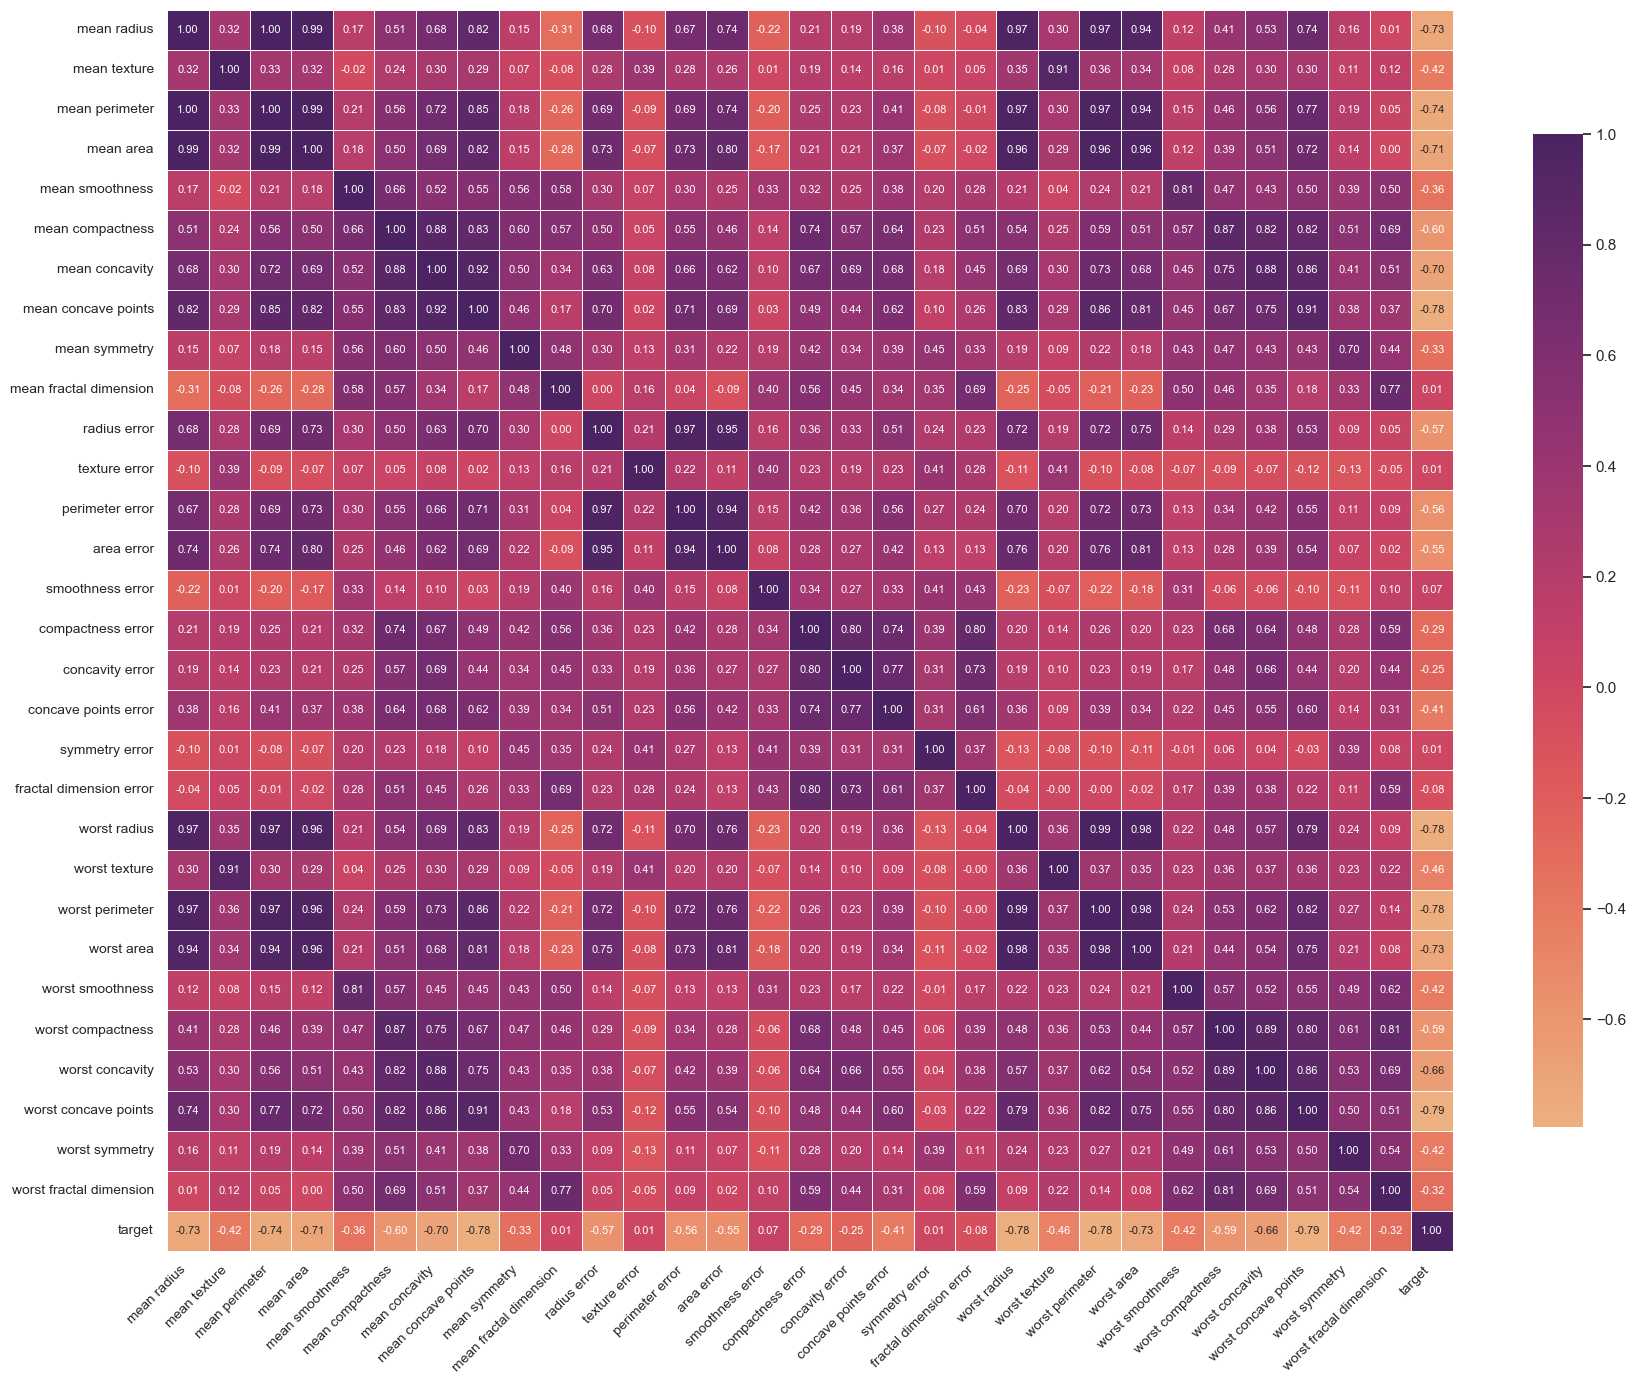

In [21]:
#dropping column 'type'
df.drop(columns=['type'],axis=1,inplace=True)
#plotting heatmap
correlation_matrix=df.corr()
plt.figure(figsize=(18, 14))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='flare',linewidths=0.5, annot_kws={"size": 8}, cbar_kws={'shrink': 0.8})  
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [22]:
high_corr = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix < 1.0)].round(2)


rows, cols = high_corr.stack().index.to_frame(index=False).T.values

# Combine the rows, columns, and values into a DataFrame for better display
extracted_df = pd.DataFrame({
    'Row': rows,
    'Column': cols,
    'Value': high_corr.stack().values
})

In [23]:
print(colored("Features with high correlation\n","green"))
extracted_df

Features with high correlation



,Row,Column,Value
0,mean radius,mean perimeter,1.00
1,mean radius,mean area,0.99
2,mean radius,worst radius,0.97
3,mean radius,worst perimeter,0.97
4,mean radius,worst area,0.94
5,mean texture,worst texture,0.91
6,mean perimeter,mean radius,1.00
7,mean perimeter,mean area,0.99
8,mean perimeter,worst radius,0.97
9,mean perimeter,worst perimeter,0.97


>## Note: 
`All features appears to have a near normal distribution`        
<br>
`All features are positively skewed`     
<br>
`Significant number of features appears to have Leptokurtic distribution`       
<br>
`There are features that are highly correlated (colinear). The colinearity might be handlend using dimensionality reduction during data preprocessing. Perform PCA if needed`          
 <br>
`The negative correlation between features seems reasonable in the domain`

<hr>

# Data Cleaning and Preprocessing

From the basic information and analysis on the data set we can infer the following conclusions:
- There are no missing values to be handled
- There are no duplicate entries to be handled
- There are no features to be encoded    

## Transforming Data
Features need to be transformed to optimize their skewness.

In [24]:
#log tranforming features
for feature in feature_list:
    df[feature] = df[feature].apply(lambda x: np.cbrt(x) if x > 0 else x)

In [25]:
#creating function to plot histogram and box plot after transformation
sns.set_theme(palette='flare')
def plot_features(feature):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    #histogram
    sns.histplot(df[feature], kde=True, ax=axs[0])
    axs[0].set_title(f'{feature} - Histogram')
    
    #boxplot
    sns.boxplot(y=df[feature], ax=axs[1]) 
    axs[1].set_title(f'{feature} - Box Plot')
    
    plt.show()

## Feature Distribution after Transformation and Outlier Detection 
We need to check for outliers and handle them accordingly

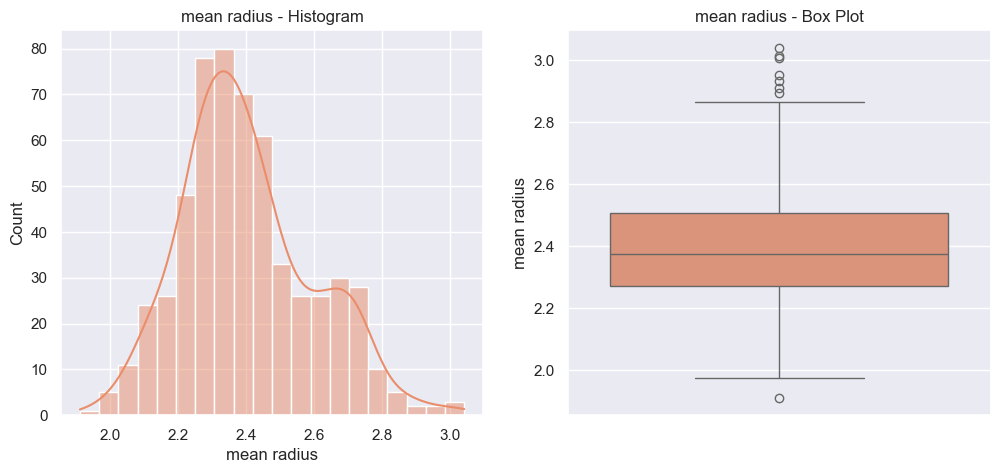

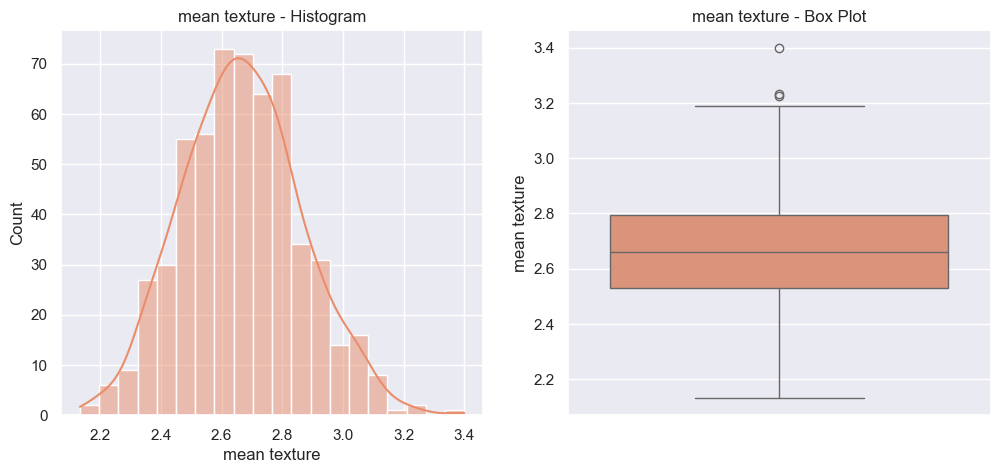

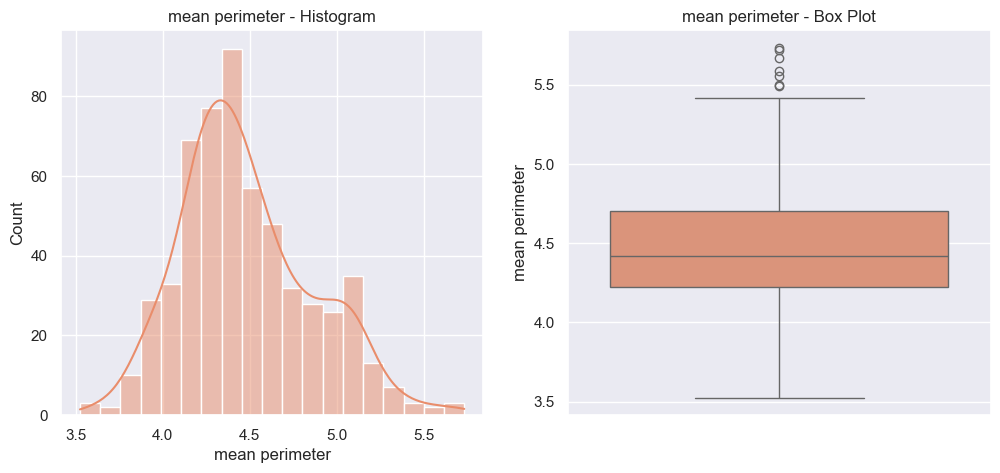

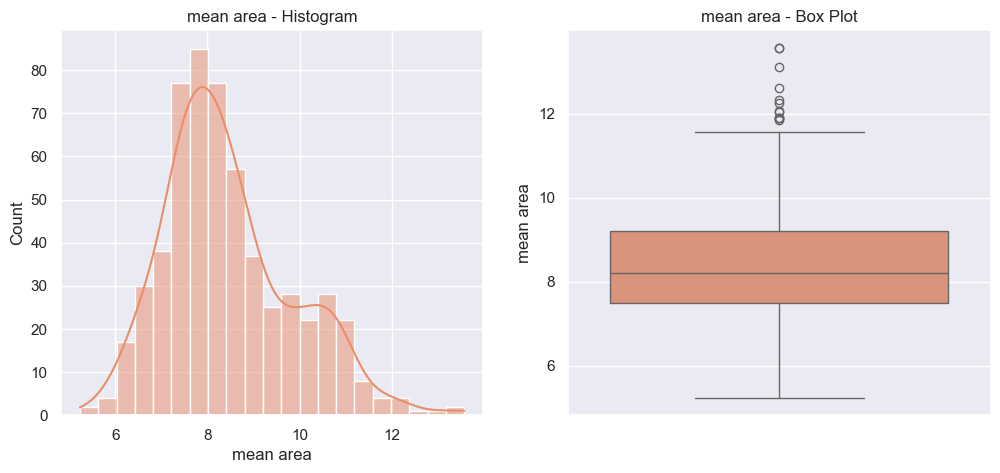

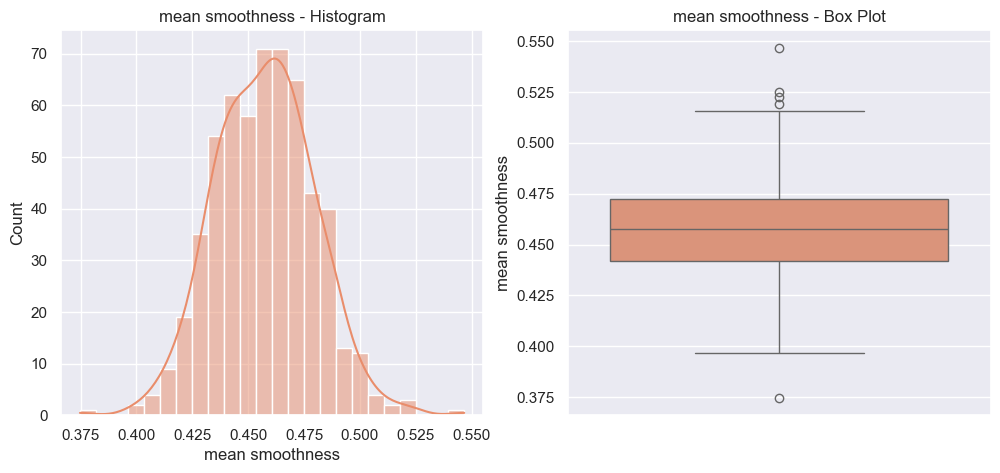

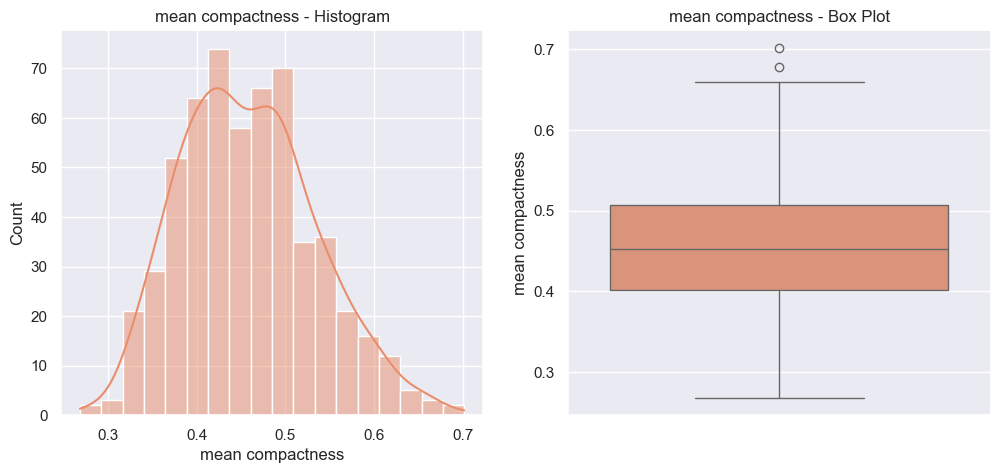

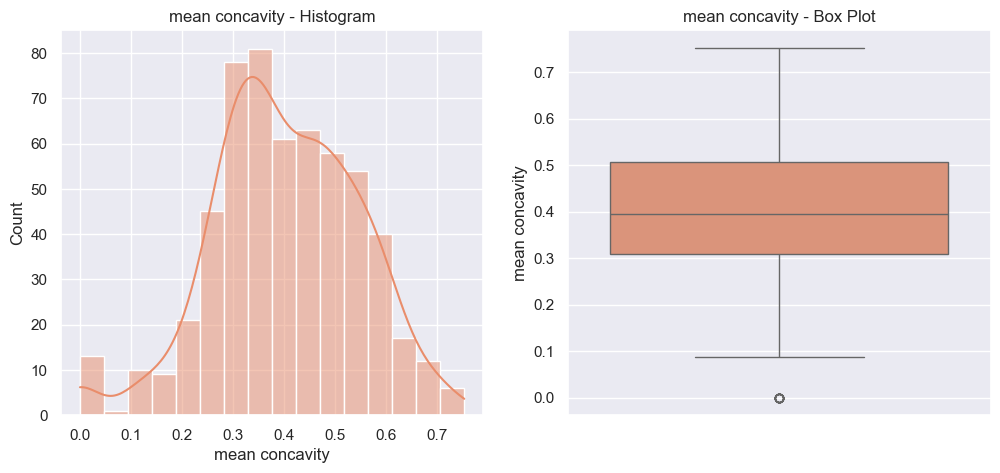

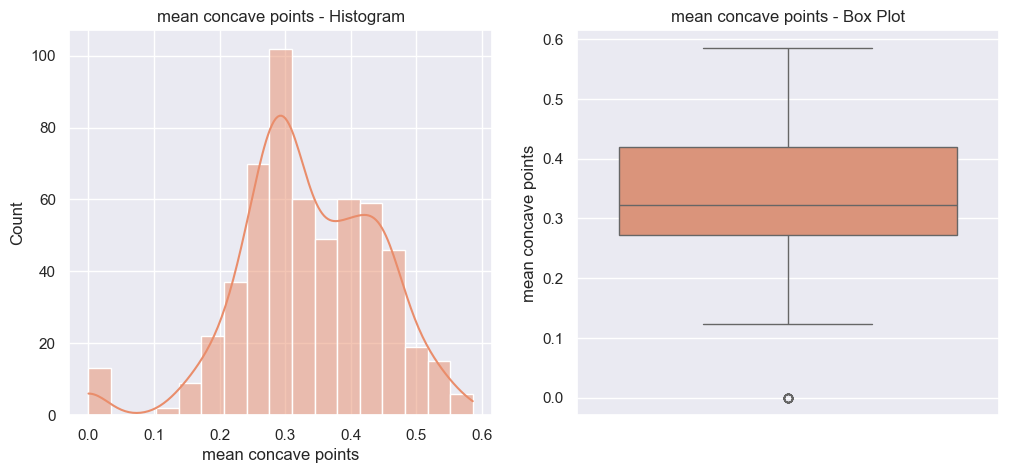

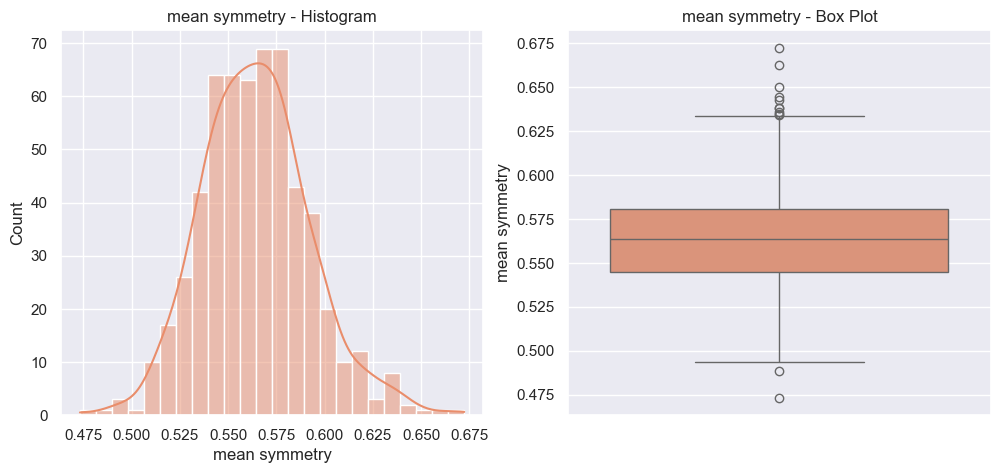

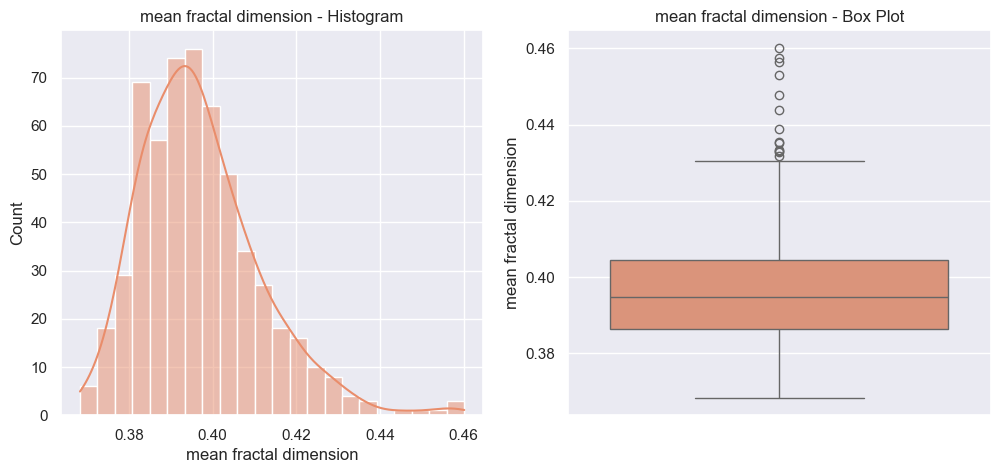

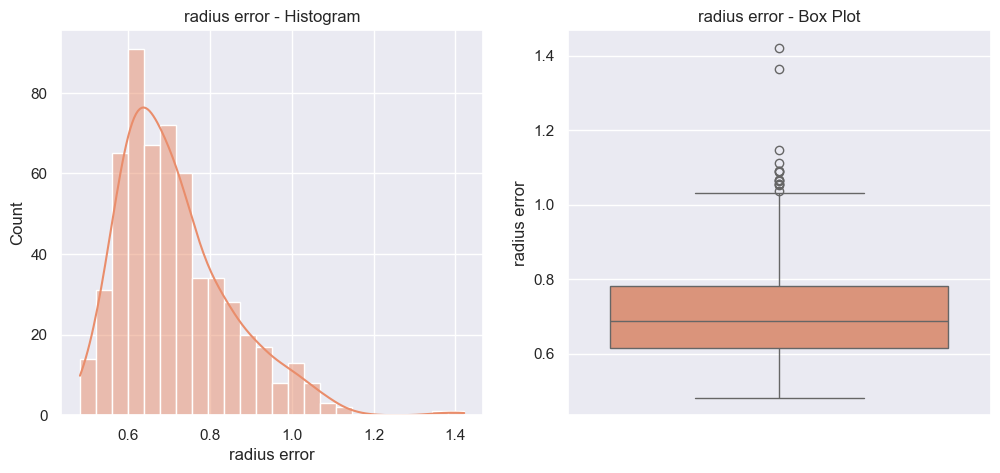

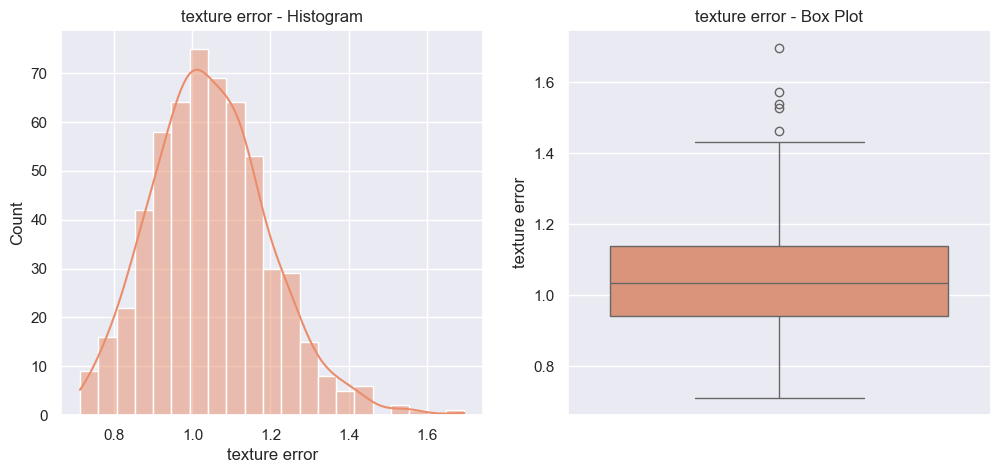

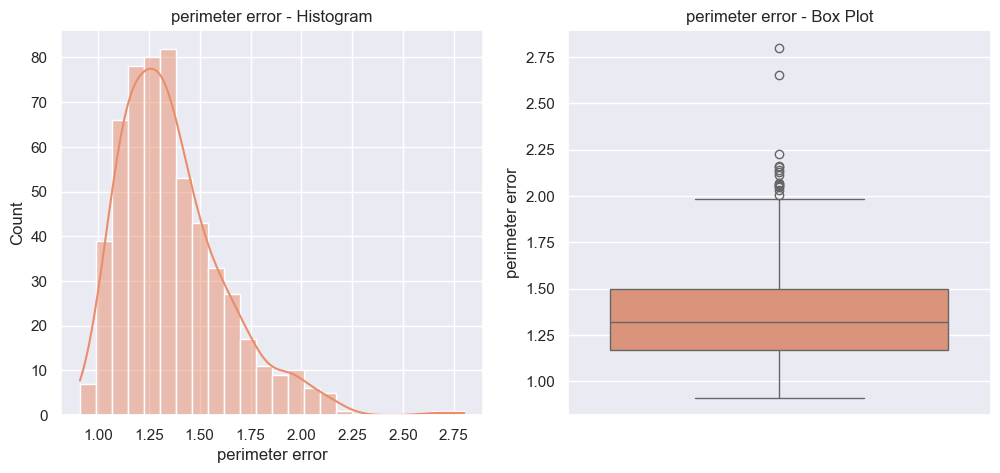

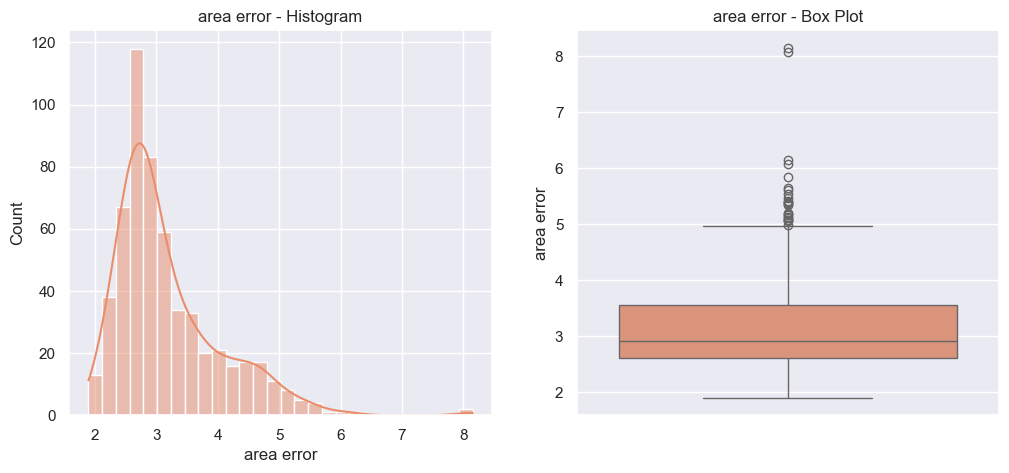

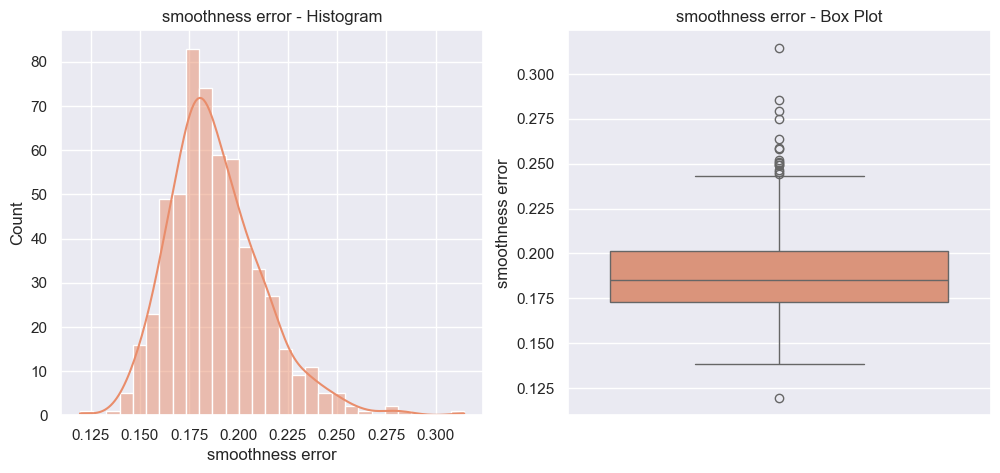

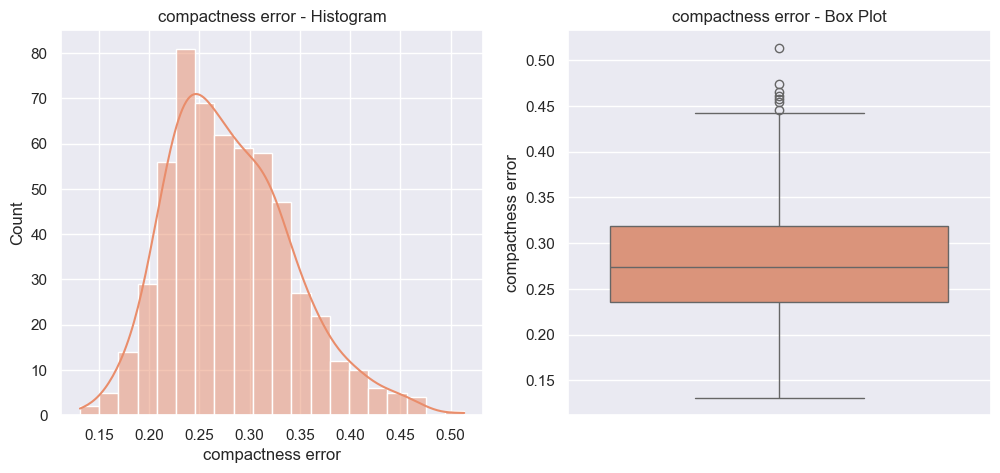

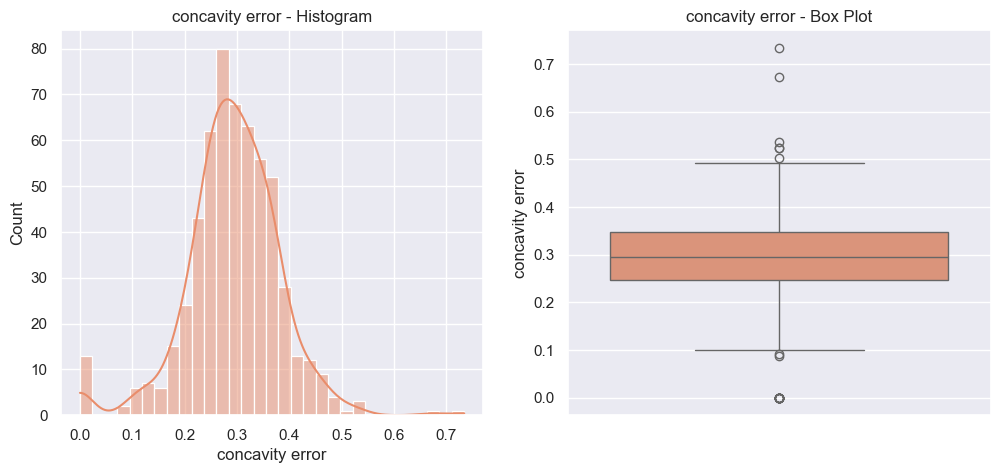

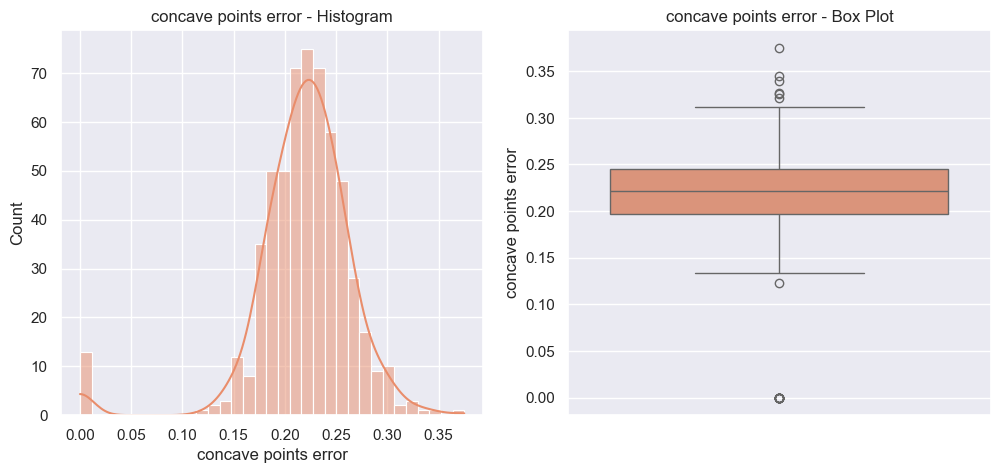

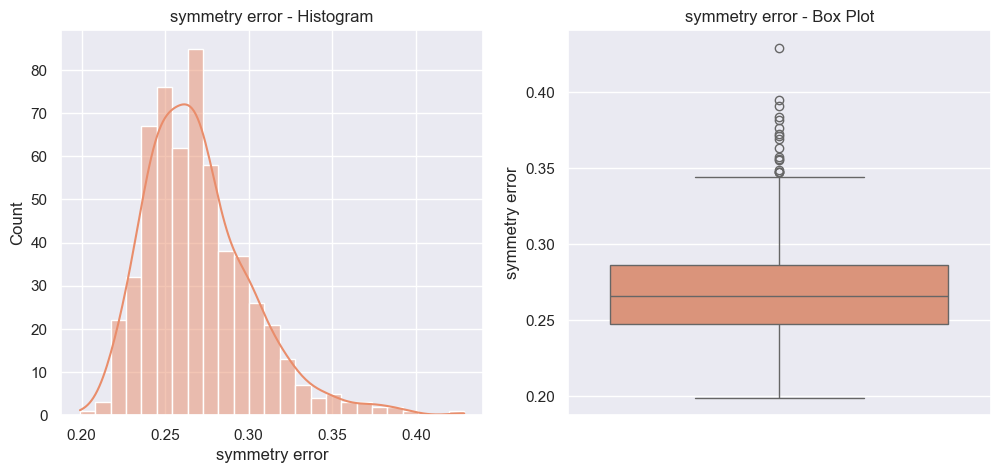

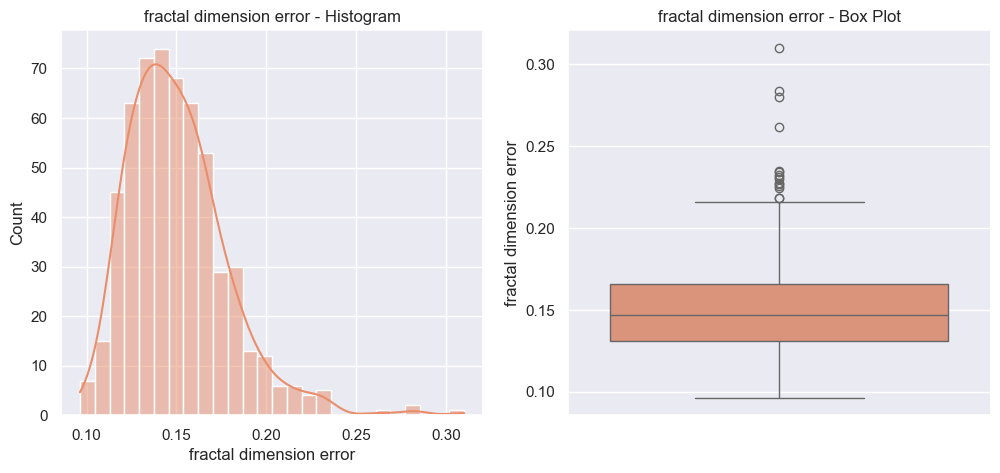

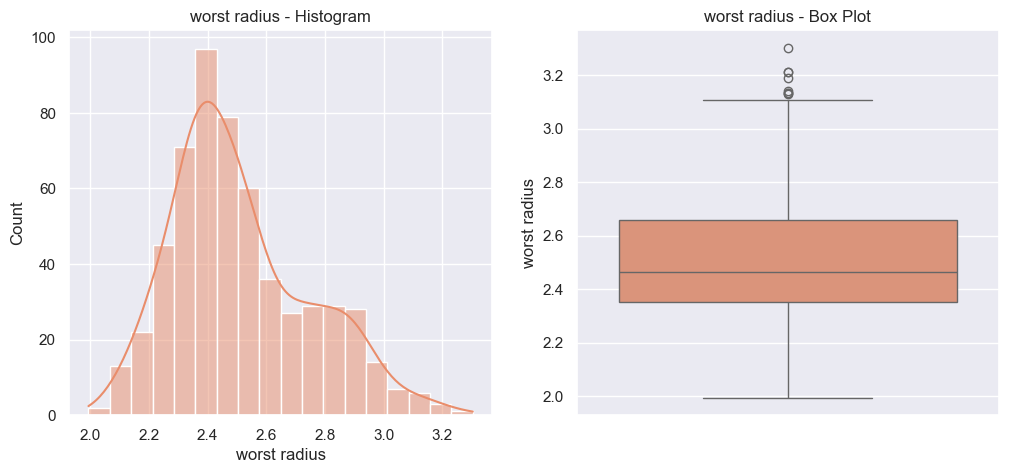

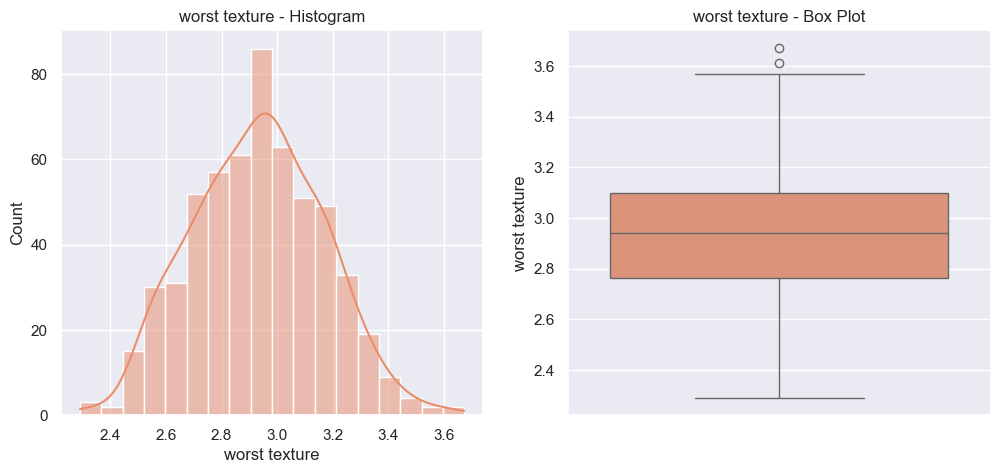

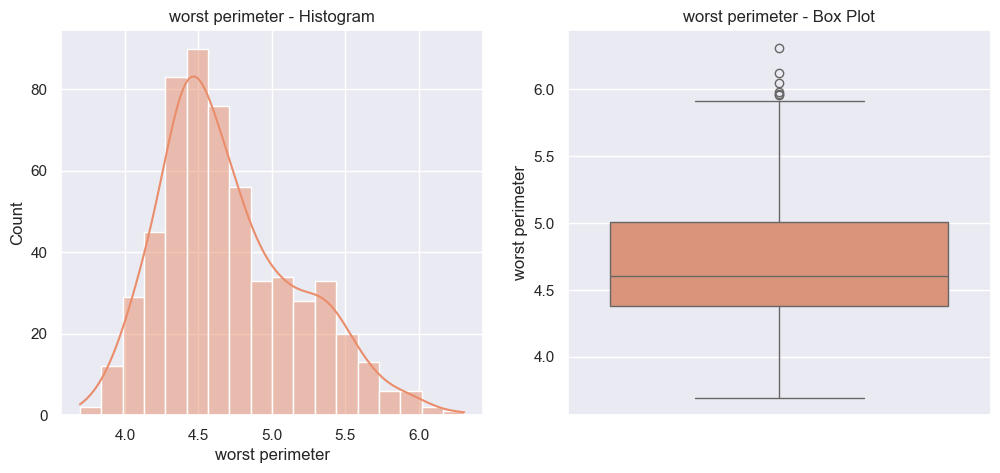

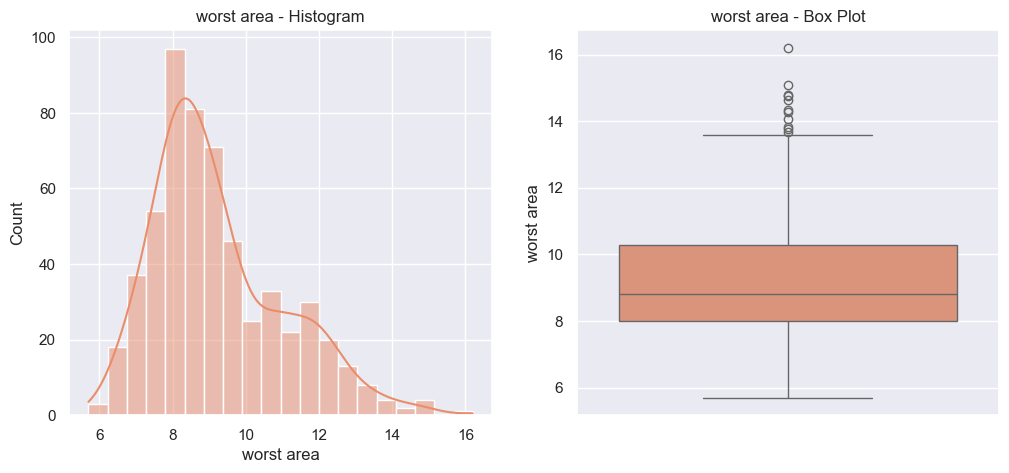

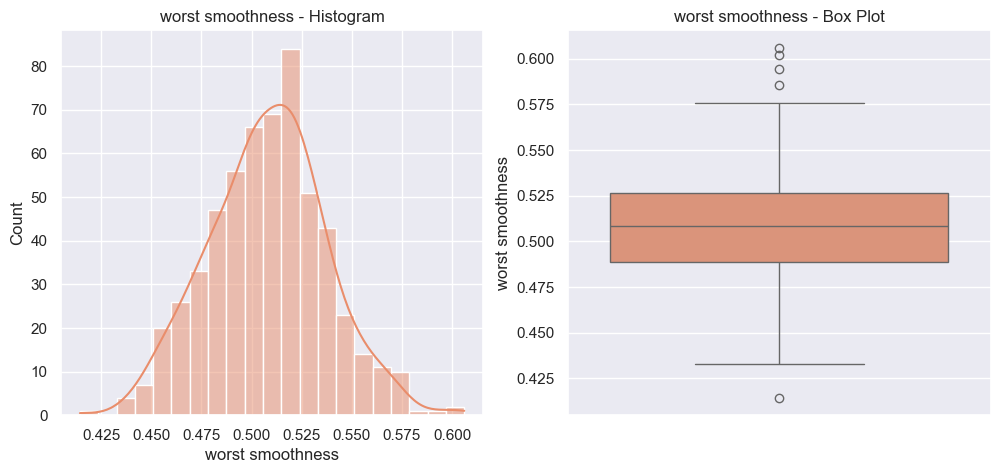

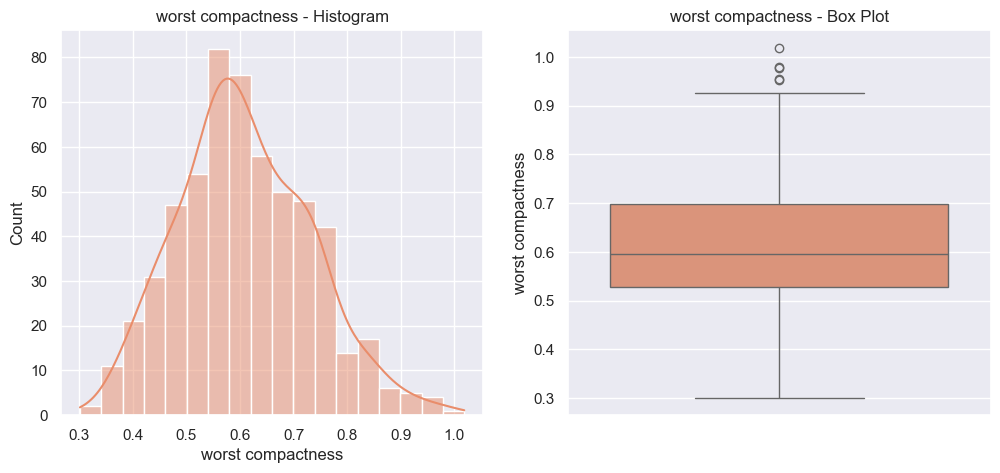

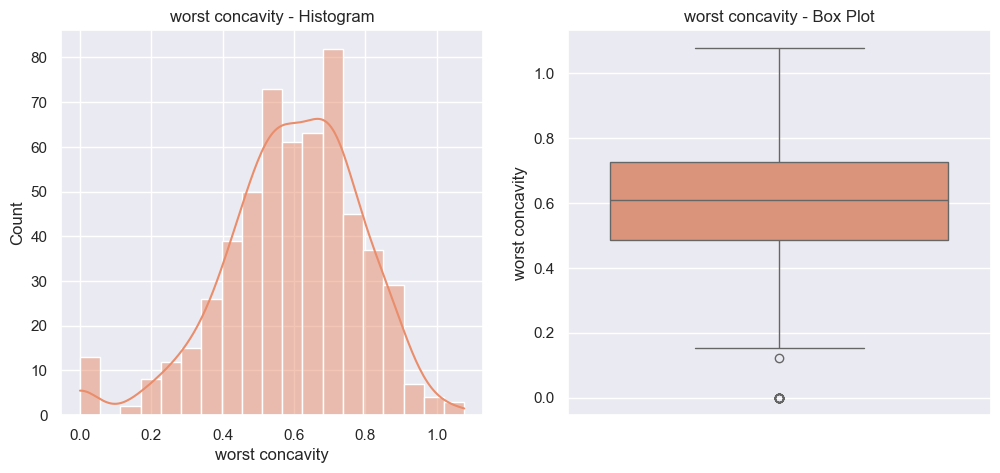

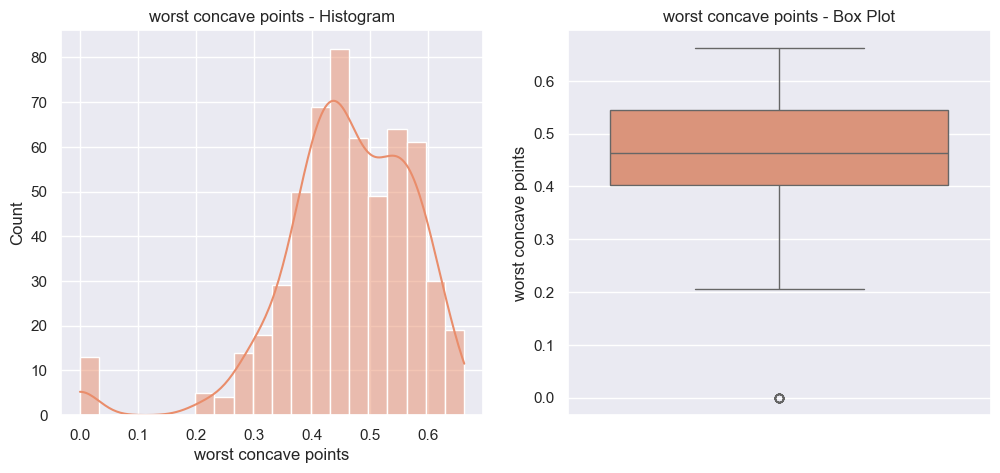

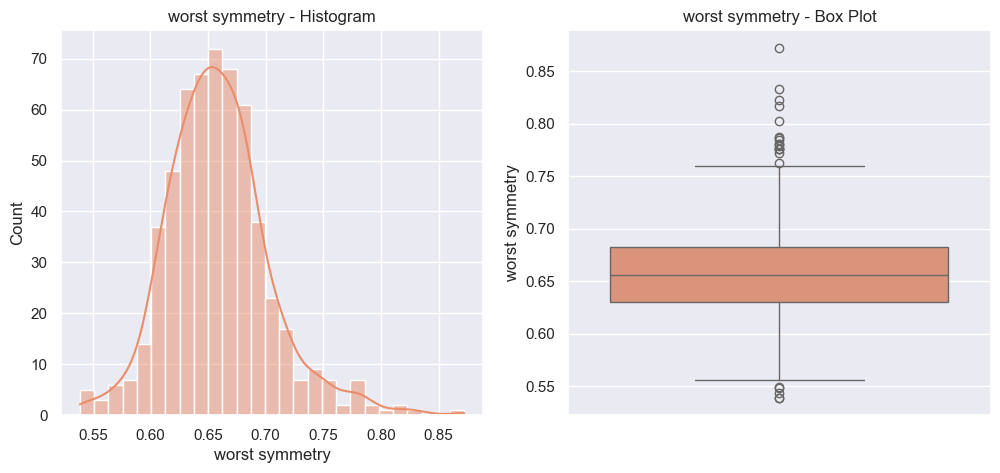

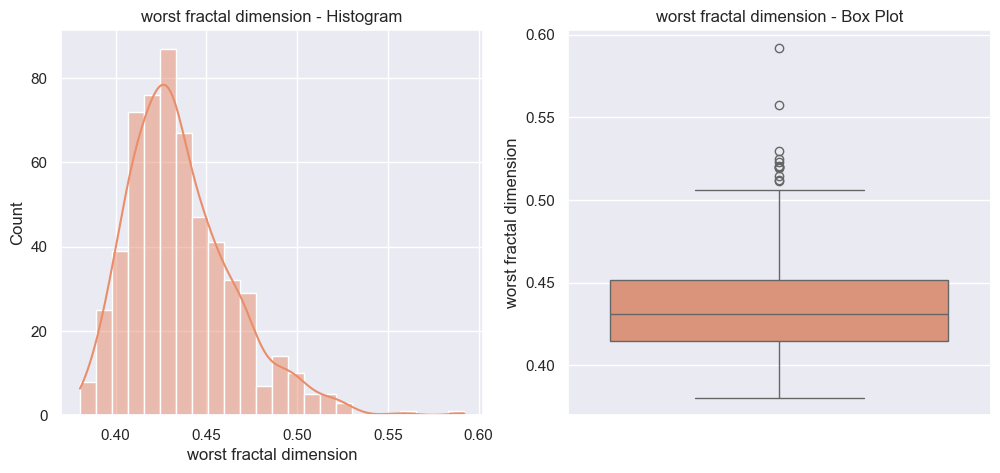

In [26]:
#plotting features
for feature in feature_list:
    plot_features(feature)

In [27]:
#displaying skewness of features after transformation
print(colored("Feature \t\tSkewness","green"))

for feature in feature_list:
    print(f"{feature} \t\t{df[feature].skew()}")

Feature 		Skewness
mean radius 		0.5174610628031082
mean texture 		0.20073686798221554
mean perimeter 		0.542925636197298
mean area 		0.7159485643178007
mean smoothness 		0.1045287273180041
mean compactness 		0.3648517013456588
mean concavity 		-0.24789271960558318
mean concave points 		-0.43580174337983263
mean symmetry 		0.34874062507619513
mean fractal dimension 		0.9943026958097484
radius error 		1.1289876024709733
texture error 		0.48924171852780407
perimeter error 		1.246259807076873
area error 		1.568997428255214
smoothness error 		0.9172919001935763
compactness error 		0.6000260727212194
concavity error 		-0.27187589080675423
concave points error 		-1.803760267007993
symmetry error 		1.107728313495706
fractal dimension error 		1.2784710249322349
worst radius 		0.67858265716378
worst texture 		0.07750017261283713
worst perimeter 		0.6755068571632705
worst area 		0.8853411462506503
worst smoothness 		0.04433805671116641
worst compactness 		0.33014418542994595
worst concavity 		-0

>## Note:
`Tried square root transformation, cube root transformation and log transformation on features, of which log transformation gave the overall best result.Few features were moderately skewed and highly skewed after log transformation, but transforming again yielded less desired results`    
<br>
`There are few features with moderate or high skewness even after the transformation. They might be eliminated during dimensionality reduction and/or feature selection`      
<br>
`There are outliers in all features`      
<br>
`The outliers are not handled as of now. Might be handled later based on the model performances.`

## Splitting Dataset into Features (X) and Target(Y)

In [28]:
# Features
X = df.drop(columns=['target'])
# Target
Y = df['target']

## Scaling Data 
Features need to be scaled in order to adjust their magnitude (since most classification algorithms are sensitive to the range or distribution of data). Here we use `StandardScaler` to scale data.

In [29]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
X_scaled=pd.DataFrame(standard_scaler.fit_transform(X),columns=X.columns)

In [30]:
#inspecting features after scaling
X_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.131525,-2.476328,1.286362,1.111110,1.518953,2.566512,1.868354,1.809610,2.094036,2.202058,2.326890,-0.525483,2.586887,2.520398,-0.120124,1.386099,0.946188,0.672359,1.272681,1.180463,1.807408,-1.468460,2.121338,1.906538,1.280960,2.140711,1.549401,1.557379,2.535696,1.912172
1,1.751545,-0.295105,1.635312,1.814295,-0.819202,-0.396801,0.288506,0.717400,0.051195,-0.895271,0.755098,-0.961835,0.515233,1.180712,-0.625100,-0.736810,-0.308185,0.388353,-0.920059,0.062339,1.743423,-0.302896,1.523823,1.832168,-0.327780,-0.304137,0.144360,0.942096,-0.193262,0.364348
2,1.546213,0.521547,1.536982,1.563338,0.955700,1.116425,1.259983,1.582069,0.964599,-0.382512,1.419304,-0.820248,1.115942,1.584342,-0.221712,0.997639,0.497449,1.141079,0.385071,0.549882,1.504665,0.055379,1.368204,1.524124,0.570976,1.155542,0.891987,1.397898,1.195567,0.281496
3,-0.776191,0.326282,-0.568929,-0.836039,2.930774,2.631334,1.541644,1.281450,2.626906,4.404242,0.574103,0.022736,0.541483,-0.203192,0.845728,2.279724,1.020129,0.960637,3.758267,2.106329,-0.211819,0.212706,-0.172555,-0.533525,2.954009,2.790436,1.494377,1.502196,4.785295,4.153158
4,1.686858,-1.212304,1.708957,1.756572,0.326644,0.685250,1.264092,1.268675,0.040037,-0.559468,1.453564,-0.834902,1.485826,1.592008,1.545184,0.162692,1.026931,0.978153,-0.311850,0.775957,1.325411,-1.610615,1.360688,1.344415,0.275770,-0.156664,0.737323,0.726780,-0.910167,-0.370890


## Feature Selection
Feature selection is the process of selecting a subset of the most relevant features from the original dataset. We found high correlation between a number of features during correlation analysis. Hence we perform feature selection to reduce the complexity of features in order to use in the model. We use `Recursive Feature Elimination (RFE)` from `sklearn` library for feature scaling. 

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#the relevant 20 features are selected using RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe.fit(X_scaled, Y)
selected_features = X_scaled.columns[rfe.support_]
X_final=df[selected_features] #extracting a dataset with the selected features
print(selected_features)

Index(['mean texture', 'mean area', 'mean compactness', 'mean concavity',
       'mean concave points', 'radius error', 'area error',
       'compactness error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


## Splitting data into Training and Testing Data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (455, 20)
Shape of X_test: (114, 20)
Shape of Y_train: (455,)
Shape of Y_test: (114,)


<hr>

# Model Training

**The following models were specified in the problem statement:**           
`1. Logistic Regression`       
`2. Decision Tree Classifier`       
`3. Random Forest Classifier`           
`4. Support Vector Machine (SVM)`           
`5. k-Nearest Neighbors (k-NN)`         

## 1. Logistic Regression

Logistic Regression is a linear model that predicts the probability of a sample belonging to a particular class. It's suitable for this dataset because it's a binary classification problem. 

In [33]:
from sklearn.linear_model import LogisticRegression
#training Logistic Regression Model
LR_Model = LogisticRegression()
LR_Model.fit(X_train, Y_train)

LogisticRegression()

## 2. Decision Tree Classifier

Decision Tree Classifier is a tree-based model that splits the data into subsets based on features. It's suitable for this dataset because it can handle high-dimensional data and is easy to interpret.

In [34]:
from sklearn.tree import DecisionTreeClassifier
#training Decision Tree Classifier Model
DTC_Model = DecisionTreeClassifier()
DTC_Model.fit(X_train, Y_train)

DecisionTreeClassifier()

## 3. Random Forest Classifier

Random Forest Classifier is an ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting. It's suitable for this dataset because it can handle high-dimensional data and is robust to outliers.

In [35]:
from sklearn.ensemble import RandomForestClassifier
#training Random Forest Classifier Model
RFC_Model = RandomForestClassifier(n_estimators=100)
RFC_Model.fit(X_train, Y_train)

RandomForestClassifier()

## 4.Support Vector Machine (SVM)

SVM is a linear model that finds the hyperplane that maximally separates the classes. It's suitable for this dataset because it's a binary classification problem and can handle high-dimensional data.

In [36]:
from sklearn.svm import SVC
#training Support Vector Machine Model
SVM_Model = SVC(kernel='linear', C=1)
SVM_Model.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

## 5. k-Nearest Neighbors (k-NN)

k-NN is a non-parametric model that predicts the class of a sample based on the majority vote of its neighbors. It's suitable for this dataset because it's a simple and intuitive model that can handle high-dimensional data.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
#training k-Nearest Neighbors Model
KNN_Model = KNeighborsClassifier(n_neighbors=5)
KNN_Model.fit(X_train, Y_train)

KNeighborsClassifier()

<hr>

# Comparing Accuracy

In [38]:
#creating a list of trained models
models=[LR_Model,DTC_Model,RFC_Model,SVM_Model,KNN_Model]
scores={}
#listing accuracy of models
for model in models:
    model_name=model.__class__.__name__
    scores[model_name]=model.score(X_test,Y_test)*100
    print(colored(f"Model: {model_name}, Accuracy: {scores[model_name]:.2f} %","green"))
    print()

Model: LogisticRegression, Accuracy: 96.49 %

Model: DecisionTreeClassifier, Accuracy: 93.86 %

Model: RandomForestClassifier, Accuracy: 95.61 %

Model: SVC, Accuracy: 96.49 %

Model: KNeighborsClassifier, Accuracy: 96.49 %



In [39]:
#extracting detainl of best and worst performing models
best_score=max(scores.values())
best_model=list(scores.keys())[list(scores.values()).index(best_score)]
worst_score=min(scores.values())
worst_model=list(scores.keys())[list(scores.values()).index(worst_score)]

In [40]:
print(f'The best-performing algorithm is the {best_model} with an accuracy of {best_score:.2f} %')     
print(f'The best-performing algorithm is the {worst_model} with an accuracy of {worst_score:.2f} %')     

The best-performing algorithm is the LogisticRegression with an accuracy of 96.49 %
The best-performing algorithm is the DecisionTreeClassifier with an accuracy of 93.86 %


LogisticRegression 96.49 %



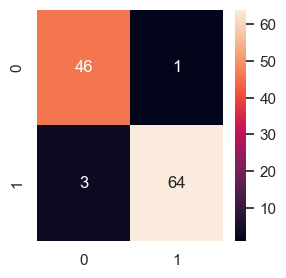

DecisionTreeClassifier 93.86 %



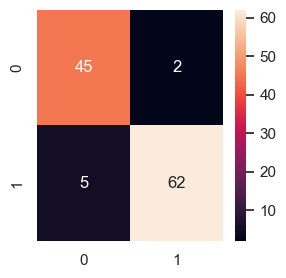

RandomForestClassifier 95.61 %



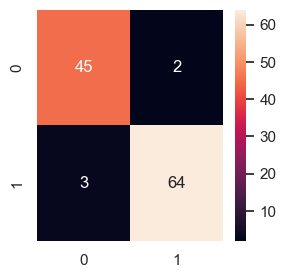

SVC 96.49 %



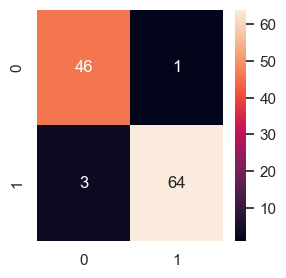

KNeighborsClassifier 96.49 %



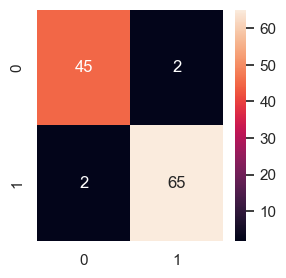

In [41]:
#visualizing confusion matrices
from sklearn.metrics import confusion_matrix
for model in models:
    Y_pred=model.predict(X_test)
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    print(colored(f"{model.__class__.__name__} {scores[model.__class__.__name__]:.2f} %\n","green"))
    plt.figure(figsize=(3,3))
    sns.heatmap(cf_matrix, annot=True)
    plt.show()

# Note:
## Best performing algorithms are Logistic Regression, Support Vector Machine, k-Nearest Neighbors   with an accuracy of 96.49 %           
## Worst performing Algorithm is Decision Tree Classifier with an accuracy of 93.86 %

<hr><br><hr>

# Model Deployment (optional)

In [43]:
import pickle

for model in models:
    filename=f'cancer_{model.__class__.__name__}.pkl'
    with open(filename,'wb') as file:
        pickle.dump(model,file)